# 0. Import Dependencies and Pretrained Model

In [1]:
!pip install --upgrade tensorflow_hub

Requirement already up-to-date: tensorflow_hub in c:\users\varun\anaconda3\lib\site-packages (0.12.0)


In [2]:
# importing libraries
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
# load the pretrained model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [4]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [5]:
content_image = load_image('profile.jfif')
style_image = load_image('dali.jpeg')

# 2. Visualize Output

In [6]:
content_image.shape

TensorShape([1, 520, 413, 3])

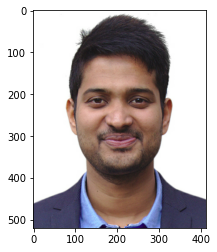

In [7]:
plt.imshow(np.squeeze(content_image))
plt.show()

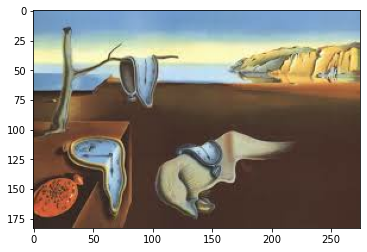

In [8]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [9]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

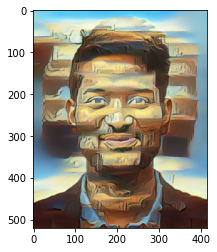

In [10]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [11]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True